In [1]:
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline


In [2]:
import halotools
##Basically tests HaloTools Catalogue'
##Creates the bolshoi simulation in redshift 0 and 0.5

ModuleNotFoundError: No module named 'halotools'

In [4]:
from halotools.empirical_models import PrebuiltHodModelFactory, PrebuiltSubhaloModelFactory
from halotools.mock_observables import return_xyz_formatted_array
from halotools.mock_observables import wp
from halotools.sim_manager import CachedHaloCatalog
from scipy import interpolate


##CAN SKIP UNTIL [13] IF YOU HAVE THE FILES IN ..\codes\halotoolsexplore\

In [4]:
#import halotools
#halotools.test()

In [5]:
#halotools.test_installation()

In [8]:
%%time
##what's going on with the bins??
rpbins80 = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80])
rpbins100 = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])
#print(rpbins)
rp_bin_centers80 = (rpbins80[:1] + rpbins80[1:])/2.
print(rp_bin_centers80)
print('HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH')
rp_bin_centers100 = (rpbins100[:1] + rpbins100[1:])/2.
print(rp_bin_centers100)

[ 0.3   0.55  1.55  3.05  4.05  5.05  7.55 10.05 15.05 20.05 25.05 30.05
 40.05]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
[ 0.3   0.55  1.55  3.05  4.05  5.05  7.55 10.05 15.05 20.05 25.05 30.05
 40.05 50.05]
Wall time: 0 ns


In [6]:
#from halotools.sim_manager import DownloadManager
#dman = DownloadManager()
#dman.download_processed_halo_table('bolshoi', 'rockstar', 0.5) 
#dman.download_processed_halo_table('bolshoi', 'rockstar', 0) 
### NOTE: bolshoi=WMAP5 cosmology with Lbox = 250 Mpc/h and particle mass of ~1e8 Msun/h.
### NOTE: bolplanck=Planck 2013 cosmology with Lbox = 250 Mpc/h and particle mass of ~1e8 Msun/h.

In [7]:
##The halos are stored in the halo_table attribute in the form of an Astropy Table.
##halos = halocat.halo_table # doctest: +SKIP
##As with any Astropy Table, the properties of the halos can be accessed in the same manner as a Numpy structured array or python dictionary

halocat = CachedHaloCatalog(simname = 'bolshoi', redshift = 0., halo_finder = 'rockstar')
halos = halocat.halo_table


In [8]:
#halos
#print(halos['halo_x'])

In [9]:
#print(halos['halo_y'])

In [10]:
x = halos['halo_x']
y = halos['halo_y']
z = halos['halo_z']
all_positions = return_xyz_formatted_array(x, y, z)
rpbins = np.array([1,3,6,8,10,15,20,30,40,50,60])

##the two point correlation function in the halocat space
wdm = wp(all_positions, rpbins, 60,period=halocat.Lbox, num_threads=4)

In [11]:
halocat5 = CachedHaloCatalog(simname = 'bolshoi', redshift = 0.5, halo_finder = 'rockstar')
halos5 = halocat5.halo_table


In [12]:
x5 = halos5['halo_x']
y5 = halos5['halo_y']
z5 = halos5['halo_z']
all_positions5 = return_xyz_formatted_array(x5, y5, z5)
rpbins5 = np.array([1,3,6,8,10,15,20,30,40,50,60])

wdm5 = wp(all_positions5, rpbins5, 60,period=halocat5.Lbox, num_threads=4)

In [13]:
##np.save('output\bolshoi_0_wp_dm.npy',wdm)
np.save('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolshoi_0_wp_dm.npy',wdm)
np.save('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolshoi_0.5_wp_dm.npy',wdm5)
np.save('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolshoi_rp_used.npy',rpbins)

In [13]:
wdm=np.load('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolshoi_0_wp_dm.npy')
wdm5=np.load('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolshoi_0.5_wp_dm.npy')
rpbins=np.load('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/output/bolshoi_rp_used.npy')

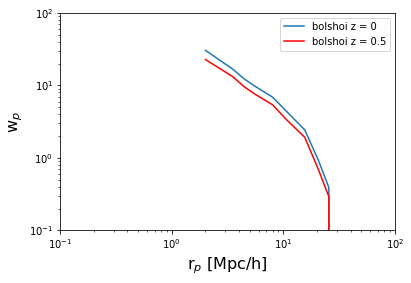

In [32]:
rpbins = np.array([1,3,6,8,10,15,20,30,40,50,60])
rp_bin_centers = (rpbins[:1] + rpbins[1:])/2.

plt.loglog(rp_bin_centers,wdm, label= 'bolshoi z = 0')
plt.loglog(rp_bin_centers,wdm5,color='r', label = 'bolshoi z = 0.5')

plt.axis([.1,100,.1,100])
plt.legend(frameon=True,numpoints=1,loc=1)
plt.xlabel('r$_{p}$ [Mpc/h]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.savefig('C:/Users/mxo431/Desktop/environments/codes/halotoolsexplore/plots/corrfunctSFpeas_bolshoi.pdf')

Text(0, 0.5, 'w$_{p}$')

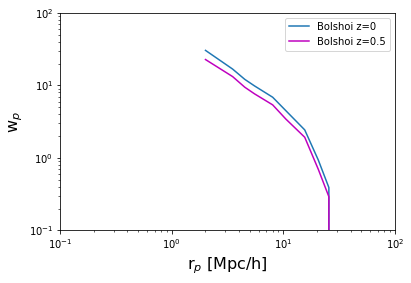

In [18]:
##Correlation function graphes versis the perpendicular distance along the line of sight

plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposx='clip')

plt.plot(rp_bin_centers,wdm,label='Bolshoi z=0')
plt.plot(rp_bin_centers,wdm5,color='m',label='Bolshoi z=0.5')

plt.axis([.1,100,.1,100])
plt.legend(frameon=True,numpoints=1,loc=1)
plt.xlabel('r$_{p}$ [Mpc/h]',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
#plt.title('Peebles ACF')
#plt.savefig('../plots/corrfunctSFpeas.pdf')

In [15]:
print(wdm)
rpbins

[ 30.51441626  16.87175972  12.12543956   9.8556689    6.83392563
   4.45280993   2.41952342   0.91446521   0.38812959  -0.03417333]


array([ 1,  3,  6,  8, 10, 15, 20, 30, 40, 50, 60])

In [30]:
print(wdm)
rpbins

[ 3.04646775e+01  1.68230107e+01  1.21303801e+01  9.85187147e+00
  6.87538001e+00  4.48437652e+00  2.43551078e+00  9.36437780e-01
  3.90418842e-01 -2.44301560e-02]


array([ 1,  3,  6,  8, 10, 15, 20, 30, 40, 50, 60])